# NoteBook 3 - CNN


---
<br>

### Name and ID:
Student 1: Sivan Zagdon 213002918
<br>
Student 2: Shir Zohar 323856542

<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/20733/logos/header.png?t=2020-05-14-08-44-45">

In [ ]:
import os
!gdown 1KyBxBs6L1t3b0f_fgBbXrMaFrjDaba0Z -O explainer.md


print("File exists:", os.path.exists("explainer.md"))

Downloading...
From: https://drive.google.com/uc?id=1KyBxBs6L1t3b0f_fgBbXrMaFrjDaba0Z
To: /content/explainer.md
100% 1.03k/1.03k [00:00<00:00, 4.40MB/s]
File exists: True


##**Winning model weights**

In [1]:

import os
!gdown 1mbet7MXGQHsR4Ck0F_A3jpQOplMEA2Le -O weights.md

print("File exists:", os.path.exists("weights.md"))

Downloading...
From (original): https://drive.google.com/uc?id=1mbet7MXGQHsR4Ck0F_A3jpQOplMEA2Le
From (redirected): https://drive.google.com/uc?id=1mbet7MXGQHsR4Ck0F_A3jpQOplMEA2Le&confirm=t&uuid=ae75022b-6f21-49be-90ab-99a75259b602
To: /content/weights.md
100% 40.6M/40.6M [00:00<00:00, 42.8MB/s]
File exists: True


# Utils

**Import Libraries**

In [ ]:

import os
import shutil
import kagglehub
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image

import tensorflow as tf



!pip install ipython-autotime --quiet
!pip install gdown --upgrade --quiet
%load_ext autotime



The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 4.22 s (started: 2025-03-20 12:11:49 +00:00)


**Load and Preprocess Dataset**


In this code, we downloaded and extracted the Stanford Cars dataset and its metadata using gdown. We then loaded the dataset annotations and class names from an Excel file and a .mat file, respectively. Finally, we processed the data to extract image paths and labels, converting them into categorical format for training and testing a machine learning model.

In [ ]:

!pip install gdown --quiet

!gdown --id 1yr0Ac4ACIegWp3neDKy23xMJJ4mQx8Fu -O explainer_transer_learning.zip

!unzip -o explainer_transer_learning.zip

!ls -l explainer_transer_learning.md

DATASET_ID = "10f-OkhFIv1p5IOtY7NBM31n52Ndt7CjS"
DATASET_ZIP = "stanford_cars_with_class_names.zip"
DATASET_EXCEL = "stanford_cars_with_class_names.xlsx"

!gdown {DATASET_ID} -O {DATASET_ZIP}
!unzip -q {DATASET_ZIP} -d /content/dataset

!mkdir -p /content/dataset
path = kagglehub.dataset_download("jessicali9530/stanford-cars-dataset")
!mv /root/.cache/kagglehub/datasets/jessicali9530/stanford-cars-dataset/versions/2/* /content/dataset

metadata_path = "/content/dataset/" + DATASET_EXCEL
xls = pd.ExcelFile(metadata_path)

train_df = pd.read_excel(xls, sheet_name="train")
test_df = pd.read_excel(xls, sheet_name="test")

annotations_path = "/content/dataset/cars_annos.mat"
metadata = scipy.io.loadmat(annotations_path)
annotations = metadata["annotations"]
class_names = metadata["class_names"]
class_names_list = [name[0] for name in class_names[0]]

def extract_annotations(df):
    annotations = []
    class_names = np.empty(196, dtype=object)
    for _, row in df.iterrows():
        image_path = row["image"]
        class_num = int(row["class"]) - 1
        class_name = row["ture_class_name"]
        class_names[class_num] = class_name
        annotations.append((image_path, class_num))
    return annotations, class_names

train_annotations, train_class_names = extract_annotations(train_df)
test_annotations, test_class_names = extract_annotations(test_df)

def get_image_paths_and_labels(df, dataset_type="cars_train"):
    image_paths = []
    labels = []

    for _, row in df.iterrows():
        image_name = row["image"]
        class_num = int(row["class"]) - 1
        clean_image_name = image_name.replace('"', '').replace("'", "")
        image_paths.append(f"/content/dataset/{dataset_type}/{clean_image_name}")
        labels.append(class_num)

    return image_paths, labels

train_image_paths, train_labels = get_image_paths_and_labels(train_df, "cars_train")
test_image_paths, test_labels = get_image_paths_and_labels(test_df, "cars_test")

train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=196)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=196)

print("Dataset Successfully Loaded!")
print(f"Number of training images: {len(train_image_paths)}")
print(f"Number of test images: {len(test_image_paths)}")
print(f"Example training image path: {train_image_paths[0]}")
print(f"Sample class names: {train_class_names[:10]}")


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1yr0Ac4ACIegWp3neDKy23xMJJ4mQx8Fu
To: /content/explainer_transer_learning.zip
100% 1.87k/1.87k [00:00<00:00, 6.71MB/s]
Archive:  explainer_transer_learning.zip
  inflating: explainer_transer_learning.md  
-rw-r--r-- 1 root root 4404 Feb 25 08:04 explainer_transer_learning.md
Downloading...
From: https://drive.google.com/uc?id=10f-OkhFIv1p5IOtY7NBM31n52Ndt7CjS
To: /content/stanford_cars_with_class_names.zip
100% 766k/766k [00:00<00:00, 129MB/s]


100%|██████████| 1.82G/1.82G [00:12<00:00, 156MB/s]

Extracting files...


Dataset Successfully Loaded!
Number of training images: 8144
Number of test images: 8041
Example training image path: /content/dataset/cars_train/00001.jpg
Sample class names: ['AM General Hummer SUV 2000' 'Acura RL Sedan 2012' 'Acura TL Sedan 2012'
 'Acura TL Type-S 2008' 'Acura TSX Sedan 2012' 'Acura Integra Type R 2001'
 'Acura ZDX Hatchback 2012' 'Aston Martin V8 Vantage Convertible 2012'
 'Aston Martin V8 Vantage Coupe 2012'
 'Aston Martin Virage Convertible 2012']
time: 47.6 s (started: 2025-03-20 12:12:05 +00:00)


**Display Random Images with Annotations**


In this code, we randomly select 5 images from the training annotations and display them with their bounding boxes. We use OpenCV to load the images and draw rectangles around the objects using the coordinates from the dataset. Finally, the images are displayed with their class names as titles using Matplotlib.

---



🔹 Image: 00294.jpg | Class: Buick Rainier SUV 2007
   Bounding Box → x1: 11, y1: 141, x2: 629, y2: 386
🔹 Image: 01932.jpg | Class: Cadillac SRX SUV 2012
   Bounding Box → x1: 61, y1: 67, x2: 570, y2: 344
🔹 Image: 07892.jpg | Class: Buick Enclave SUV 2012
   Bounding Box → x1: 13, y1: 170, x2: 612, y2: 413
🔹 Image: 02560.jpg | Class: Hyundai Sonata Hybrid Sedan 2012
   Bounding Box → x1: 16, y1: 49, x2: 383, y2: 277
🔹 Image: 06754.jpg | Class: GMC Savana Van 2012
   Bounding Box → x1: 22, y1: 61, x2: 774, y2: 517


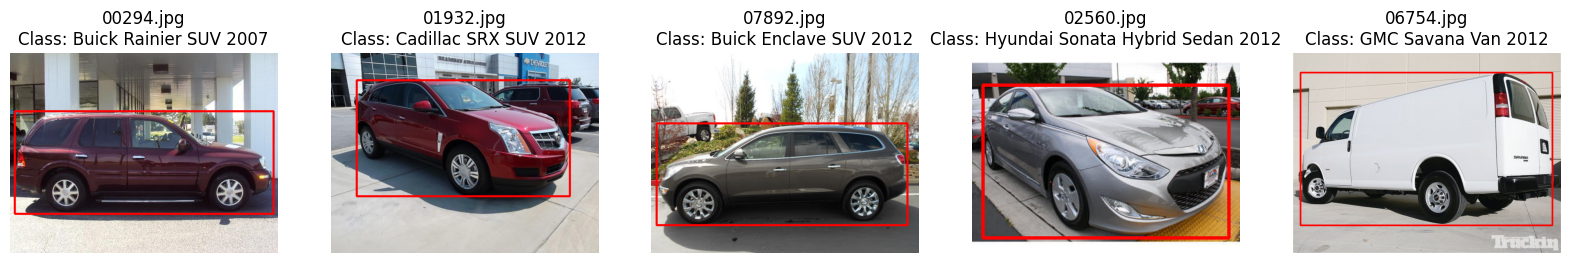

time: 1.11 s (started: 2025-03-20 12:12:55 +00:00)


In [ ]:

import cv2
import random

random_samples = random.sample(train_annotations, 5)

def display_images_with_annotations(samples, dataset_path, df):
    fig, axes = plt.subplots(1, 5, figsize=(20, 5))

    if len(samples) < 5:
        print("Not enough images to display.")
        return

    for idx, sample in enumerate(samples):
        if len(sample) < 2:
            print(f"Skipping invalid sample: {sample}")
            continue

        image_name, class_num = sample
        image_path = os.path.join(dataset_path, "cars_train/cars_train", image_name)

        if not os.path.exists(image_path):
            print(f"Image not found: {image_path}")
            continue

        image = cv2.imread(image_path)
        if image is None:
            print(f"Failed to load image: {image_path}")
            continue

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        row = df[df['image'] == image_name]
        if not row.empty:
            x1, y1, x2, y2 = int(row.iloc[0]['x1']), int(row.iloc[0]['y1']), int(row.iloc[0]['x2']), int(row.iloc[0]['y2'])
            cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 3)

            print(f"🔹 Image: {image_name} | Class: {train_class_names[class_num]}")
            print(f"   Bounding Box → x1: {x1}, y1: {y1}, x2: {x2}, y2: {y2}")

        title_text = f"{image_name}\nClass: {train_class_names[class_num]}"
        axes[idx].imshow(image)
        axes[idx].set_title(title_text)
        axes[idx].axis("off")

    plt.show()

dataset_path = "/content/dataset"
display_images_with_annotations(random_samples, dataset_path, train_df)


The code randomly displays 5 images from the test set along with their class names. If an image cannot be loaded, an error message is shown; otherwise, the image is displayed with the appropriate label.

Image: 07725.jpg | Class #187 → Toyota Camry Sedan 2012
Image: 01322.jpg | Class #137 → Hyundai Genesis Sedan 2012
Image: 03262.jpg | Class #137 → Hyundai Genesis Sedan 2012
Image: 04994.jpg | Class #121 → GMC Acadia SUV 2012
Image: 04303.jpg | Class #139 → Hyundai Elantra Touring Hatchback 2012


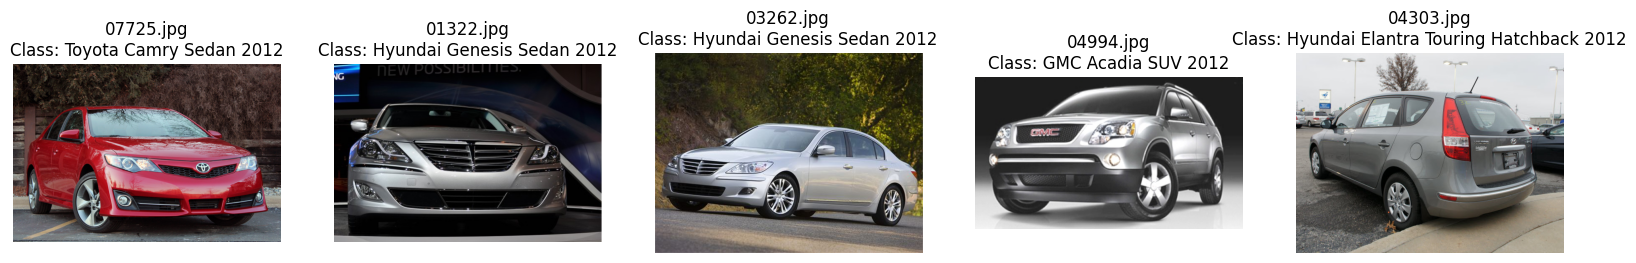

time: 4.31 s (started: 2025-03-20 12:13:01 +00:00)


In [ ]:

metadata_path = "/content/dataset/stanford_cars_with_class_names.xlsx"
xls = pd.ExcelFile(metadata_path)
test_df = pd.read_excel(xls, sheet_name="test")

test_df["image"] = test_df["image"].astype(str).str.replace("'", "")

TEST_IMAGE_PATH = "/content/dataset/cars_test/cars_test/"

def display_random_test_images(df, dataset_path, num_samples=5):
    """
    Displays random test images along with their class names.
    """
    fig, axes = plt.subplots(1, num_samples, figsize=(20, 5))

    samples = df.sample(n=num_samples, random_state=random.randint(0, 10000))

    for idx, (_, row) in enumerate(samples.iterrows()):
        image_name = row["image"]
        image_path = os.path.join(dataset_path, image_name)

        if not os.path.exists(image_path):
            print(f"Image not found: {image_path}")
            continue

        image = cv2.imread(image_path)
        if image is None:
            print(f"Failed to load image: {image_path}")
            continue

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        class_name = row["ture_class_name"]
        class_num = int(row["class"])

        print(f"Image: {image_name} | Class #{class_num} → {class_name}")

        title_text = f"{image_name}\nClass: {class_name}"
        axes[idx].imshow(image)
        axes[idx].set_title(title_text)
        axes[idx].axis("off")

    plt.show()

display_random_test_images(test_df, TEST_IMAGE_PATH, num_samples=5)


## **Experiment 1 - Train & Validation**

The code defines and trains a **Convolutional Neural Network (CNN)** to classify images from the **Stanford Cars Dataset**. The model consists of four convolutional layers with **batch normalization**, **ReLU activation**, and **max pooling** for feature extraction, followed by a **fully connected layer** that maps the features to **196 car classes**. The dataset is split into **training (85%) and validation (15%) sets** to monitor model performance and detect overfitting. The network is optimized using the **Adam optimizer** and **cross-entropy loss**, and a training loop iterates over **10 epochs**, computing both **training and validation loss and accuracy** to assess model generalization. After training, the model is evaluated on a separate **test set** to measure final classification accuracy.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, random_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import pandas as pd


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.1, contrast=0.1),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


class StanfordCarsDataset(Dataset):
    def __init__(self, df, dataset_path, transform=None):
        self.df = df
        self.dataset_path = dataset_path
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        image_path = f"{self.dataset_path}/{row['image']}"
        label = int(row["class"]) - 1

        image = Image.open(image_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        return image, label


DATASET_PATH_TRAIN = "/content/dataset/cars_train/cars_train"
DATASET_PATH_TEST = "/content/dataset/cars_test/cars_test"


full_train_dataset_1 = StanfordCarsDataset(train_df, DATASET_PATH_TRAIN, transform=transform)


train_size = int(0.85 * len(full_train_dataset_1))
val_size = len(full_train_dataset_1) - train_size
train_dataset_1, val_dataset_1 = random_split(full_train_dataset_1, [train_size, val_size])


train_loader_1 = DataLoader(train_dataset_1, batch_size=64, shuffle=True)
val_loader_1 = DataLoader(val_dataset_1, batch_size=64, shuffle=False)


class ImprovedMediumCNN(nn.Module):
    def __init__(self):
        super(ImprovedMediumCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(256)

        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.4)

        self.flatten_size = self._get_flatten_size()
        self.fc1 = nn.Linear(self.flatten_size, 512)
        self.fc2 = nn.Linear(512, 196)

    def _get_flatten_size(self):
        dummy_input = torch.randn(1, 3, 32, 32)
        x = self.pool(self.bn1(torch.relu(self.conv1(dummy_input))))
        x = self.pool(self.bn2(torch.relu(self.conv2(x))))
        x = self.pool(self.bn3(torch.relu(self.conv3(x))))
        x = self.pool(self.bn4(torch.relu(self.conv4(x))))
        x = x.view(1, -1)
        return x.shape[1]

    def forward(self, x):
        x = self.pool(self.bn1(torch.relu(self.conv1(x))))
        x = self.pool(self.bn2(torch.relu(self.conv2(x))))
        x = self.pool(self.bn3(torch.relu(self.conv3(x))))
        x = self.pool(self.bn4(torch.relu(self.conv4(x))))
        x = torch.flatten(x, 1)
        x = self.dropout(x)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


model_1 = ImprovedMediumCNN().to(device)
criterion_1 = nn.CrossEntropyLoss()
optimizer_1 = optim.Adam(model_1.parameters(), lr=0.0005)


train_losses_1, val_losses_1 = [], []
train_accuracies_1, val_accuracies_1 = [], []


def validate_1(model, loader):
    model.eval()
    total_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion_1(outputs, labels)
            total_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    avg_loss = total_loss / len(loader)
    accuracy = 100. * correct / total
    return avg_loss, accuracy


def train_1(model, train_loader, val_loader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        total_loss, correct, total = 0, 0, 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()


        avg_train_loss = total_loss / len(train_loader)
        train_accuracy = 100. * correct / total
        train_losses_1.append(avg_train_loss)
        train_accuracies_1.append(train_accuracy)


        val_loss, val_accuracy = validate_1(model, val_loader)
        val_losses_1.append(val_loss)
        val_accuracies_1.append(val_accuracy)

        print(f"Epoch {epoch+1}/{epochs} | Train Loss: {avg_train_loss:.4f} | Train Acc: {train_accuracy:.2f}% | Val Loss: {val_loss:.4f} | Val Acc: {val_accuracy:.2f}%")


train_1(model_1, train_loader_1, val_loader_1, criterion_1, optimizer_1, epochs=10)


Using device: cuda
Epoch 1/10 | Train Loss: 5.2422 | Train Acc: 0.97% | Val Loss: 5.1493 | Val Acc: 1.72%
Epoch 2/10 | Train Loss: 5.0009 | Train Acc: 2.53% | Val Loss: 5.0741 | Val Acc: 2.78%
Epoch 3/10 | Train Loss: 4.7854 | Train Acc: 4.81% | Val Loss: 5.0071 | Val Acc: 4.34%
Epoch 4/10 | Train Loss: 4.5693 | Train Acc: 6.78% | Val Loss: 4.9568 | Val Acc: 4.75%
Epoch 5/10 | Train Loss: 4.2888 | Train Acc: 10.01% | Val Loss: 4.9764 | Val Acc: 4.99%
Epoch 6/10 | Train Loss: 3.9676 | Train Acc: 13.62% | Val Loss: 5.0477 | Val Acc: 4.66%
Epoch 7/10 | Train Loss: 3.5891 | Train Acc: 19.26% | Val Loss: 5.1867 | Val Acc: 6.38%
Epoch 8/10 | Train Loss: 3.1293 | Train Acc: 27.16% | Val Loss: 5.3867 | Val Acc: 5.89%
Epoch 9/10 | Train Loss: 2.6693 | Train Acc: 35.80% | Val Loss: 5.6727 | Val Acc: 5.48%
Epoch 10/10 | Train Loss: 2.1940 | Train Acc: 45.61% | Val Loss: 6.2258 | Val Acc: 5.40%
time: 8min 55s (started: 2025-03-20 12:13:10 +00:00)


## **Experiment 1 - Test**

This function **evaluates** the trained CNN model on the test dataset and calculates its accuracy. It first sets the model to **evaluation mode**, which disables dropout and batch normalization updates. Then, it processes the test data **without computing gradients**, making inference more efficient. For each batch, it predicts the labels and compares them with the ground truth to compute the **overall accuracy**. Additionally, all predictions and true labels are stored in `all_preds_1` and `all_labels_1` for later analysis, such as confusion matrix generation or performance evaluation. Finally, the test accuracy is printed.

In [ ]:

test_dataset_1 = StanfordCarsDataset(test_df, DATASET_PATH_TEST, transform=transform)
test_loader_1 = DataLoader(test_dataset_1, batch_size=64, shuffle=False)

all_preds_1 = []
all_labels_1 = []

def test_1(model, test_loader, criterion):
    model.eval()
    correct = 0
    total = 0
    total_loss = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

            total_loss += loss.item()
            all_preds_1.extend(predicted.cpu().numpy())
            all_labels_1.extend(labels.cpu().numpy())

    acc1test = 100 * correct / total
    avg_test_loss = total_loss / len(test_loader)

    print(f"Test Accuracy: {acc1test:.2f}%")
    print(f"Test Loss: {avg_test_loss:.4f}")

    return acc1test, avg_test_loss


acc1test, test_loss_1 = test_1(model_1, test_loader_1, criterion_1)



Test Accuracy: 6.73%
Test Loss: 6.0037
time: 51.7 s (started: 2025-03-20 12:22:16 +00:00)


## **Experiment 1 - Performance Analysis:**


The code visualizes the model's performance in **Experiment 1** using six plots. It tracks **training vs. validation loss** and **training vs. validation accuracy** over epochs to assess learning progress and detect overfitting. A **confusion matrix heatmap** analyzes classification errors, while a **classification report** ranks classes by **F1-score**. The **top 20 performing classes** are displayed in a bar chart. These visualizations provide insights into model generalization and areas for improvement.

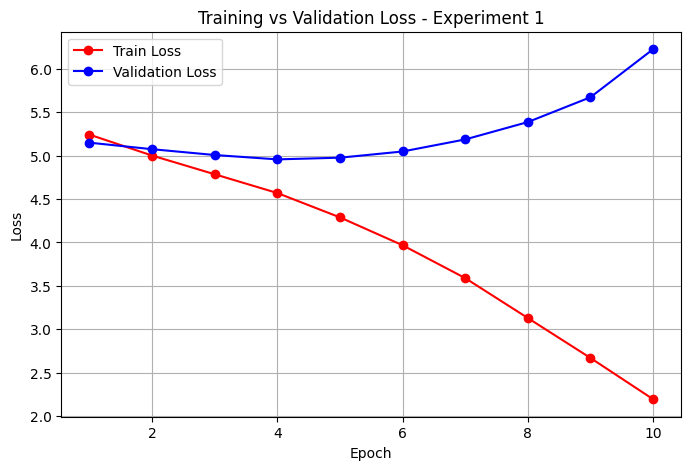

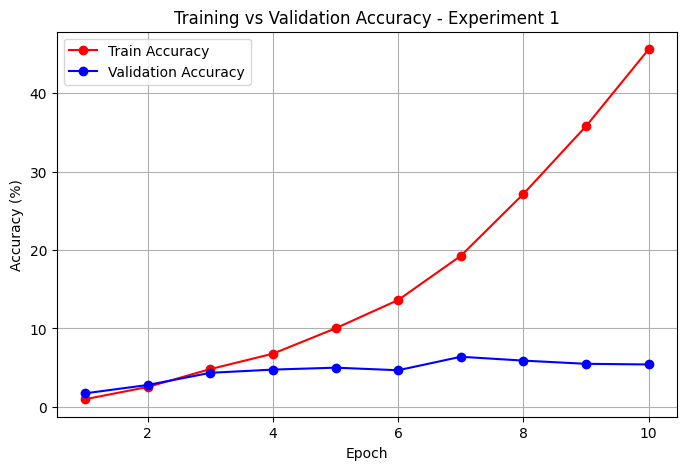

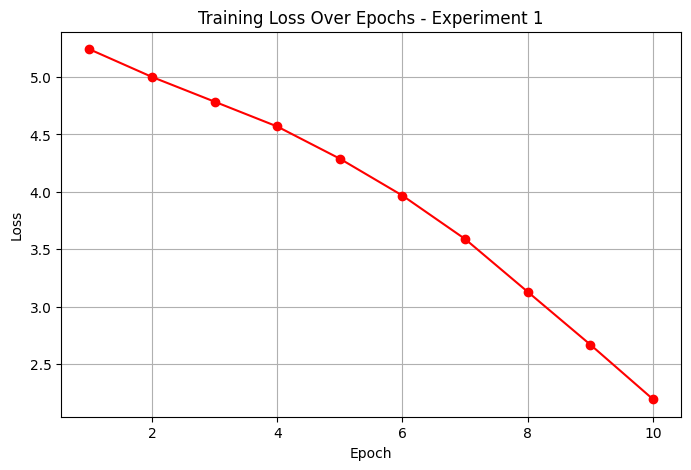

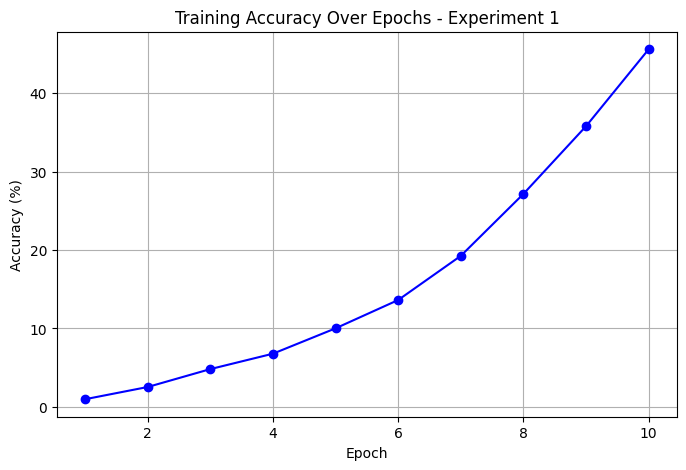

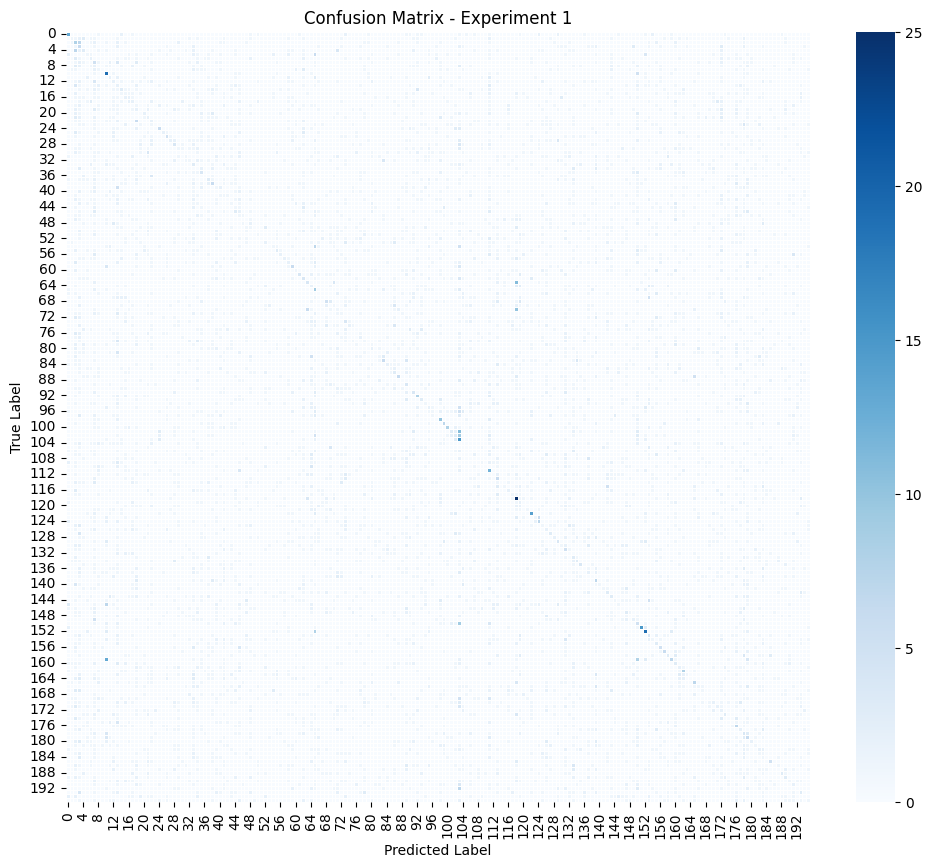

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


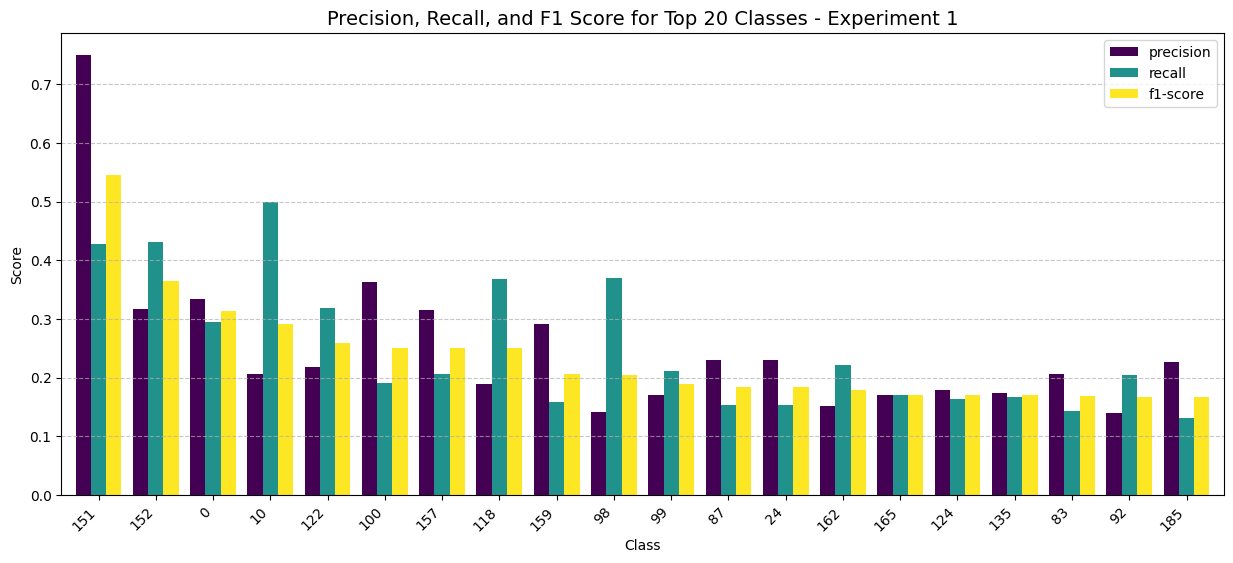

time: 1.92 s (started: 2025-03-20 12:23:17 +00:00)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report


plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_losses_1) + 1), train_losses_1, marker='o', linestyle='-', color='r', label="Train Loss")
plt.plot(range(1, len(val_losses_1) + 1), val_losses_1, marker='o', linestyle='-', color='b', label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss - Experiment 1")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_accuracies_1) + 1), train_accuracies_1, marker='o', linestyle='-', color='r', label="Train Accuracy")
plt.plot(range(1, len(val_accuracies_1) + 1), val_accuracies_1, marker='o', linestyle='-', color='b', label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Training vs Validation Accuracy - Experiment 1")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_losses_1) + 1), train_losses_1, marker='o', linestyle='-', color='r')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs - Experiment 1")
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_accuracies_1) + 1), train_accuracies_1, marker='o', linestyle='-', color='b')
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Training Accuracy Over Epochs - Experiment 1")
plt.grid(True)
plt.show()


conf_matrix_1 = confusion_matrix(all_labels_1, all_preds_1, labels=range(196))
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix_1, annot=False, fmt="d", cmap="Blues", linewidths=0.5)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Experiment 1")
plt.show()


report_1 = classification_report(all_labels_1, all_preds_1, output_dict=True)
df_report_1 = pd.DataFrame(report_1).transpose()
df_report_1 = df_report_1.iloc[:-3, :3]


df_report_sorted_1 = df_report_1.sort_values(by="f1-score", ascending=False).head(20)
fig, ax = plt.subplots(figsize=(15, 6))
df_report_sorted_1.plot(kind="bar", ax=ax, width=0.8, colormap="viridis")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.title("Precision, Recall, and F1 Score for Top 20 Classes - Experiment 1", fontsize=14)
plt.ylabel("Score")
plt.xlabel("Class")
plt.legend(loc="upper right")
plt.show()


## **Experiment 2 - Train & Validation**

This code defines and trains a **medium-sized CNN model** for car classification using the **Stanford Cars Dataset**. The model consists of **three convolutional layers** with batch normalization, **average pooling**, and **dropout** for regularization. The dataset is preprocessed with **resizing, augmentation, and normalization**, and split into **85% training and 15% validation** to monitor model performance and detect overfitting. The network is trained for **20 epochs** using the **Adam optimizer** and **cross-entropy loss**, tracking both **training and validation loss and accuracy** at each epoch. After training, the model is evaluated on a separate **test set** to measure final classification accuracy.



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, random_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import pandas as pd

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


transform_2 = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


class StanfordCarsDataset(Dataset):
    def __init__(self, df, dataset_path, transform=None):
        self.df = df
        self.dataset_path = dataset_path
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        image_path = f"{self.dataset_path}/{row['image']}"
        label = int(row["class"]) - 1

        image = Image.open(image_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        return image, label


DATASET_PATH_TRAIN = "/content/dataset/cars_train/cars_train"
DATASET_PATH_TEST = "/content/dataset/cars_test/cars_test"


full_train_dataset_2 = StanfordCarsDataset(train_df, DATASET_PATH_TRAIN, transform=transform_2)


train_size = int(0.85 * len(full_train_dataset_2))
val_size = len(full_train_dataset_2) - train_size
train_dataset_2, val_dataset_2 = random_split(full_train_dataset_2, [train_size, val_size])


train_loader_2 = DataLoader(train_dataset_2, batch_size=64, shuffle=True)
val_loader_2 = DataLoader(val_dataset_2, batch_size=64, shuffle=False)


class MediumCNN(nn.Module):
    def __init__(self):
        super(MediumCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.pool = nn.AvgPool2d(2, 2)
        self.flatten_size = self._get_flatten_size()
        self.fc1 = nn.Linear(self.flatten_size, 256)
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(256, 196)

    def _get_flatten_size(self):
        dummy_input = torch.randn(1, 3, 32, 32)
        x = self.pool(self.bn1(torch.relu(self.conv1(dummy_input))))
        x = self.pool(self.bn2(torch.relu(self.conv2(x))))
        x = self.pool(self.bn3(torch.relu(self.conv3(x))))
        x = x.view(1, -1)
        return x.shape[1]

    def forward(self, x):
        x = self.pool(self.bn1(torch.relu(self.conv1(x))))
        x = self.pool(self.bn2(torch.relu(self.conv2(x))))
        x = self.pool(self.bn3(torch.relu(self.conv3(x))))
        x = torch.flatten(x, 1)
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.fc2(x)
        return x


model_2 = MediumCNN().to(device)
criterion_2 = nn.CrossEntropyLoss()
optimizer_2 = optim.Adam(model_2.parameters(), lr=0.001)


train_losses_2, val_losses_2 = [], []
train_accuracies_2, val_accuracies_2 = [], []


def validate_2(model, loader):
    model.eval()
    total_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion_2(outputs, labels)
            total_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    avg_loss = total_loss / len(loader)
    accuracy = 100. * correct / total
    return avg_loss, accuracy


def train_2(model, train_loader, val_loader, criterion, optimizer, epochs=20):
    model.train()
    for epoch in range(epochs):
        total_loss, correct, total = 0, 0, 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()


        avg_train_loss = total_loss / len(train_loader)
        train_accuracy = 100. * correct / total
        train_losses_2.append(avg_train_loss)
        train_accuracies_2.append(train_accuracy)


        val_loss, val_accuracy = validate_2(model, val_loader)
        val_losses_2.append(val_loss)
        val_accuracies_2.append(val_accuracy)

        print(f"Epoch {epoch+1}/{epochs} | Train Loss: {avg_train_loss:.4f} | Train Acc: {train_accuracy:.2f}% | Val Loss: {val_loss:.4f} | Val Acc: {val_accuracy:.2f}%")


train_2(model_2, train_loader_2, val_loader_2, criterion_2, optimizer_2, epochs=20)


Using device: cuda
Epoch 1/20 | Train Loss: 5.2717 | Train Acc: 1.27% | Val Loss: 5.1321 | Val Acc: 1.55%
Epoch 2/20 | Train Loss: 4.9734 | Train Acc: 3.38% | Val Loss: 5.0386 | Val Acc: 3.19%
Epoch 3/20 | Train Loss: 4.6842 | Train Acc: 5.89% | Val Loss: 4.9617 | Val Acc: 3.68%
Epoch 4/20 | Train Loss: 4.3727 | Train Acc: 9.13% | Val Loss: 5.0377 | Val Acc: 3.68%
Epoch 5/20 | Train Loss: 4.0476 | Train Acc: 12.99% | Val Loss: 5.1019 | Val Acc: 5.16%
Epoch 6/20 | Train Loss: 3.6071 | Train Acc: 19.24% | Val Loss: 5.2955 | Val Acc: 5.24%
Epoch 7/20 | Train Loss: 3.1654 | Train Acc: 26.25% | Val Loss: 5.5945 | Val Acc: 5.07%
Epoch 8/20 | Train Loss: 2.6939 | Train Acc: 35.08% | Val Loss: 6.1036 | Val Acc: 5.24%
Epoch 9/20 | Train Loss: 2.2246 | Train Acc: 45.04% | Val Loss: 6.4949 | Val Acc: 5.16%
Epoch 10/20 | Train Loss: 1.8336 | Train Acc: 54.06% | Val Loss: 6.8624 | Val Acc: 6.06%
Epoch 11/20 | Train Loss: 1.4783 | Train Acc: 61.63% | Val Loss: 7.7376 | Val Acc: 5.65%
Epoch 12/20 | T

## **Experiment 2 - Test**
This function **evaluates** the trained CNN model on the test dataset. It sets the model to **evaluation mode**, disables gradient computation for efficiency, and iterates over the test data. For each batch, it makes predictions and compares them with the true labels to calculate **test accuracy**. The predicted and actual labels are stored in `all_preds_2` and `all_labels_2` for further analysis. Finally, the **test accuracy** is printed.

In [ ]:
test_dataset_2 = StanfordCarsDataset(test_df, DATASET_PATH_TEST, transform=transform_2)
test_loader_2 = DataLoader(test_dataset_2, batch_size=64, shuffle=False)

all_preds_2 = []
all_labels_2 = []

def test_2(model, test_loader, criterion):
    model.eval()
    correct = 0
    total = 0
    total_loss = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

            total_loss += loss.item()
            all_preds_2.extend(predicted.cpu().numpy())
            all_labels_2.extend(labels.cpu().numpy())

    acc2test = 100 * correct / total
    avg_test_loss = total_loss / len(test_loader)

    print(f"Test Accuracy: {acc2test:.2f}%")
    print(f"Test Loss: {avg_test_loss:.4f}")

    return acc2test, avg_test_loss

acc2test, test_loss_2 = test_2(model_2, test_loader_2, criterion_2)


Test Accuracy: 5.86%
Test Loss: 12.6765
time: 1min 3s (started: 2025-03-20 12:44:39 +00:00)


## **Experiment 2 - Performance Analysis:**

This code **visualizes the performance** of the trained model from **Experiment 2** using six different plots. It first compares **training vs. validation loss** and **training vs. validation accuracy** over epochs to monitor learning progress and detect overfitting. Then, it generates a **confusion matrix heatmap** to analyze misclassifications across classes. Additionally, a **classification report** ranks classes by **F1-score**, and a bar chart displays the **top 20 performing classes**. These visualizations provide insights into model convergence, generalization ability, and areas for improvement.




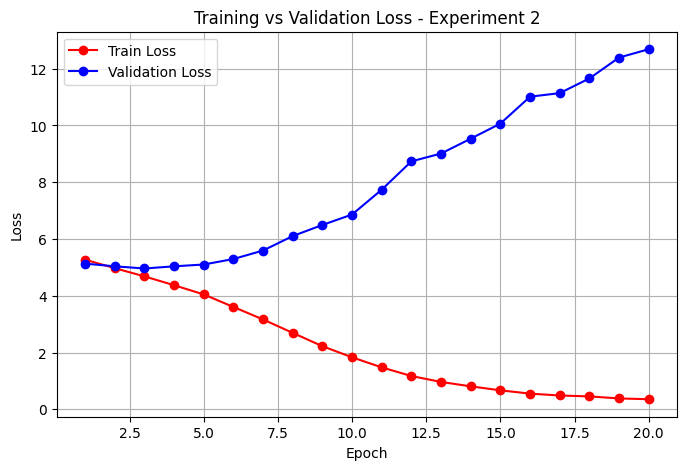

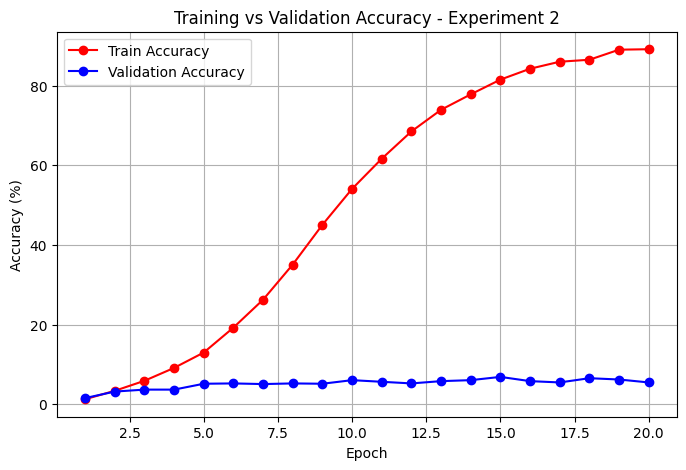

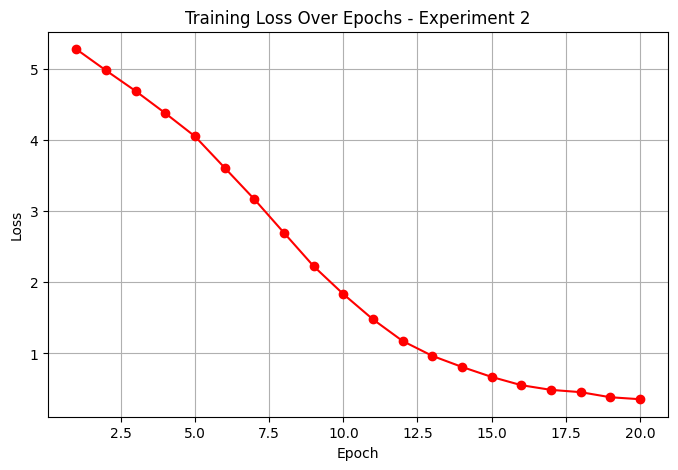

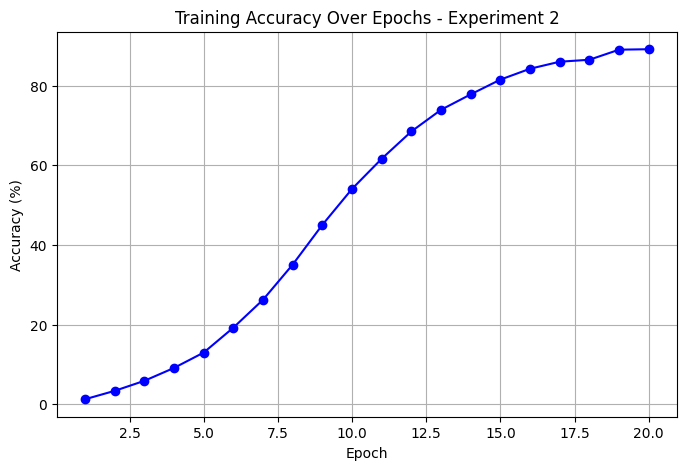

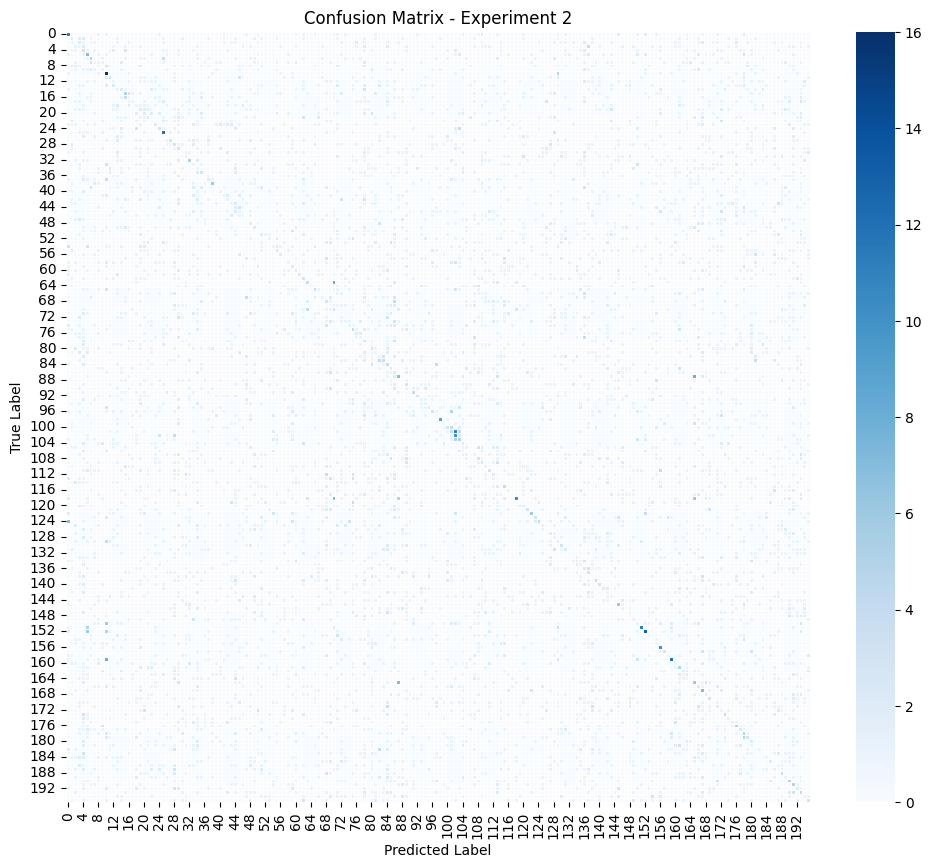

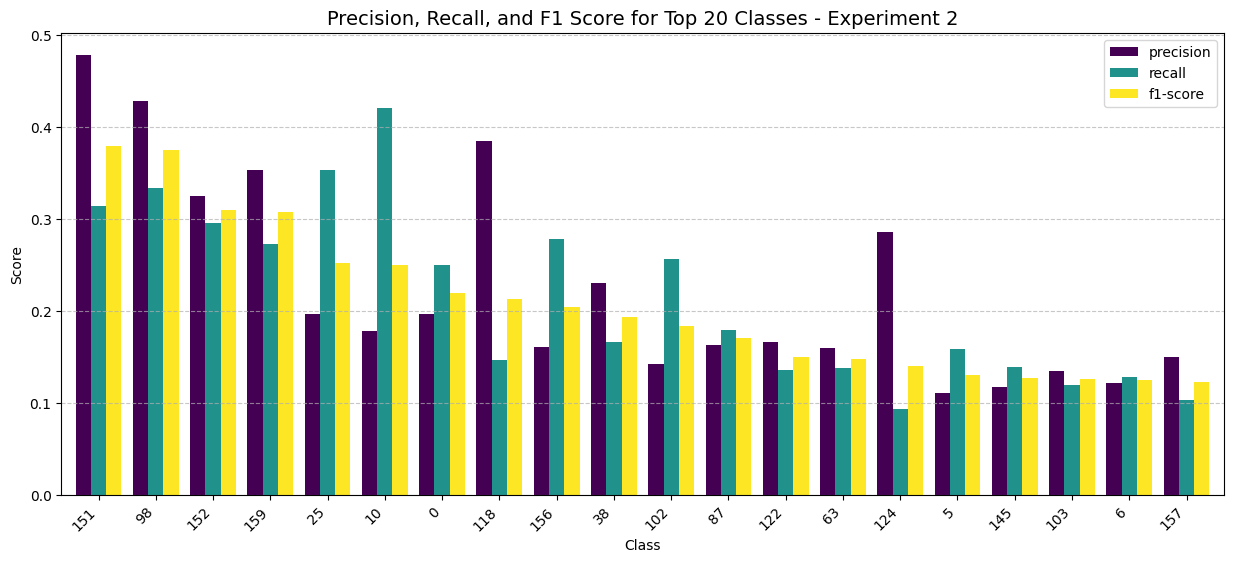

time: 3.46 s (started: 2025-03-20 12:45:51 +00:00)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report


plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_losses_2) + 1), train_losses_2, marker='o', linestyle='-', color='r', label="Train Loss")
plt.plot(range(1, len(val_losses_2) + 1), val_losses_2, marker='o', linestyle='-', color='b', label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss - Experiment 2")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_accuracies_2) + 1), train_accuracies_2, marker='o', linestyle='-', color='r', label="Train Accuracy")
plt.plot(range(1, len(val_accuracies_2) + 1), val_accuracies_2, marker='o', linestyle='-', color='b', label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Training vs Validation Accuracy - Experiment 2")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_losses_2) + 1), train_losses_2, marker='o', linestyle='-', color='r')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs - Experiment 2")
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_accuracies_2) + 1), train_accuracies_2, marker='o', linestyle='-', color='b')
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Training Accuracy Over Epochs - Experiment 2")
plt.grid(True)
plt.show()


conf_matrix_2 = confusion_matrix(all_labels_2, all_preds_2, labels=range(196))
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix_2, annot=False, fmt="d", cmap="Blues", linewidths=0.5)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Experiment 2")
plt.show()


report_2 = classification_report(all_labels_2, all_preds_2, output_dict=True)
df_report_2 = pd.DataFrame(report_2).transpose()
df_report_2 = df_report_2.iloc[:-3, :3]


df_report_sorted_2 = df_report_2.sort_values(by="f1-score", ascending=False).head(20)
fig, ax = plt.subplots(figsize=(15, 6))
df_report_sorted_2.plot(kind="bar", ax=ax, width=0.8, colormap="viridis")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.title("Precision, Recall, and F1 Score for Top 20 Classes - Experiment 2", fontsize=14)
plt.ylabel("Score")
plt.xlabel("Class")
plt.legend(loc="upper right")
plt.show()


## **Experiment 3 -Train & Validation**

This code trains an improved CNN model for classifying cars in the Stanford Cars Dataset. The dataset is split 85% training / 15% validation, with images resized to 224x224, augmented, and normalized. The CNN has four convolutional layers with batch normalization, max pooling, and adaptive average pooling, followed by a fully connected classifier. The model is trained with AdamW optimizer (lr=3e-4, weight decay=1e-4, epochs=30) and a cosine annealing scheduler (T_max=20) to improve convergence. A batch size of 64 balances efficiency and stability. Training runs for 30 epochs, tracking loss and accuracy, with the best model weights saved.



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


train_transform = transforms.Compose([
    transforms.Resize((224, 224), interpolation=Image.BILINEAR),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(5),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.05),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


class StanfordCarsDataset(Dataset):
    def __init__(self, df, dataset_path, transform=None):
        self.df = df
        self.dataset_path = dataset_path
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        image_path = f"{self.dataset_path}/{row['image']}"
        label = int(row["class"]) - 1
        image = Image.open(image_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label


DATASET_PATH_TRAIN = "/content/dataset/cars_train/cars_train"
DATASET_PATH_TEST = "/content/dataset/cars_test/cars_test"


full_train_dataset = StanfordCarsDataset(train_df, DATASET_PATH_TRAIN, transform=train_transform)


train_size = int(0.85 * len(full_train_dataset))
val_size = len(full_train_dataset) - train_size
train_dataset, val_dataset = random_split(full_train_dataset, [train_size, val_size])


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=4, pin_memory=True)


class ImprovedCNN(nn.Module):
    def __init__(self, num_classes=196):
        super(ImprovedCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding=1), nn.BatchNorm2d(64), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, padding=1), nn.BatchNorm2d(128), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(128, 256, 3, padding=1), nn.BatchNorm2d(256), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(256, 512, 3, padding=1), nn.BatchNorm2d(512), nn.ReLU(), nn.AdaptiveAvgPool2d((4,4)),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(0.4),
            nn.Linear(512 * 4 * 4, 1024), nn.ReLU(),
            nn.Linear(1024, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x


model = ImprovedCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=3e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=20)


train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []


def validate(model, loader):
    model.eval()
    total_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    avg_loss = total_loss / len(loader)
    accuracy = 100. * correct / total
    return avg_loss, accuracy

for epoch in range(30):
    model.train()
    total_loss, correct, total = 0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()


    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = 100. * correct / total
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)


    val_loss, val_accuracy = validate(model, val_loader)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1} | Train Loss: {avg_train_loss:.4f} | Train Acc: {train_accuracy:.2f}% | Val Loss: {val_loss:.4f} | Val Acc: {val_accuracy:.2f}%")
    scheduler.step()


torch.save(model.state_dict(), 'best_model.pth')


Using device: cuda


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 1 | Train Loss: 5.2479 | Train Acc: 1.03% | Val Loss: 5.1731 | Val Acc: 1.64%
Epoch 2 | Train Loss: 5.0377 | Train Acc: 2.44% | Val Loss: 5.0496 | Val Acc: 2.45%
Epoch 3 | Train Loss: 4.8496 | Train Acc: 4.06% | Val Loss: 4.9378 | Val Acc: 3.52%
Epoch 4 | Train Loss: 4.6721 | Train Acc: 5.97% | Val Loss: 4.9223 | Val Acc: 4.75%
Epoch 5 | Train Loss: 4.5167 | Train Acc: 6.43% | Val Loss: 4.8387 | Val Acc: 6.22%
Epoch 6 | Train Loss: 4.3674 | Train Acc: 9.12% | Val Loss: 4.9667 | Val Acc: 6.30%
Epoch 7 | Train Loss: 4.2203 | Train Acc: 10.68% | Val Loss: 4.9045 | Val Acc: 5.16%
Epoch 8 | Train Loss: 4.0891 | Train Acc: 12.97% | Val Loss: 4.7161 | Val Acc: 7.28%
Epoch 9 | Train Loss: 3.9298 | Train Acc: 14.03% | Val Loss: 4.6999 | Val Acc: 7.12%
Epoch 10 | Train Loss: 3.7867 | Train Acc: 16.74% | Val Loss: 4.7196 | Val Acc: 7.61%
Epoch 11 | Train Loss: 3.6671 | Train Acc: 18.48% | Val Loss: 4.6437 | Val Acc: 7.94%
Epoch 12 | Train Loss: 3.5493 | Train Acc: 21.02% | Val Loss: 4.5846 

## **Experiment 3 - Test:**

This code **evaluates the trained CNN model** on the test dataset. It sets the model to **evaluation mode**, disables gradient computation for efficiency, and processes the test data. For each batch, it makes predictions, compares them with the ground truth labels, and calculates **test accuracy**. The predicted and actual labels are stored in `all_preds_3` and `all_labels_3` for further analysis. Finally, it prints the **final test accuracy** as a percentage.

In [ ]:
test_dataset_3 = StanfordCarsDataset(test_df, DATASET_PATH_TEST, transform=test_transform)
test_loader_3 = DataLoader(test_dataset_3, batch_size=64, shuffle=False)

all_preds_3, all_labels_3 = [], []

def test(model, loader, criterion):
    model.eval()
    correct, total = 0, 0
    total_loss = 0
    preds, labels = [], []

    with torch.no_grad():
        for images, lbls in loader:
            images, lbls = images.to(device), lbls.to(device)
            outputs = model(images)


            loss = criterion(outputs, lbls)
            total_loss += loss.item()

            _, predicted = outputs.max(1)
            total += lbls.size(0)
            correct += (predicted == lbls).sum().item()
            preds.extend(predicted.cpu().numpy())
            labels.extend(lbls.cpu().numpy())

    accuracy = 100. * correct / total
    avg_test_loss = total_loss / len(loader)

    print(f"Final Test Accuracy: {accuracy:.2f}%")
    print(f"Final Test Loss: {avg_test_loss:.4f}")

    return accuracy, avg_test_loss, labels, preds


final_accuracy, test_loss_3, all_labels_3, all_preds_3 = test(model, test_loader_3, criterion)




Final Test Accuracy: 10.26%
Final Test Loss: 4.4897
time: 1min 17s (started: 2025-03-20 13:50:03 +00:00)


## **Experiment 3 - Performance Analysis:**

This code **visualizes the performance** of the trained CNN model from **Experiment 3** using six different plots. It first compares **training vs. validation loss** and **training vs. validation accuracy** over epochs to assess learning progress and detect overfitting. Then, a **confusion matrix heatmap** is generated to analyze classification errors across different classes. Additionally, a **classification report** ranks classes by **F1-score**, and a bar chart displays the **top 20 performing classes**. These visualizations provide insights into the model’s generalization ability, effectiveness, and areas for improvement.



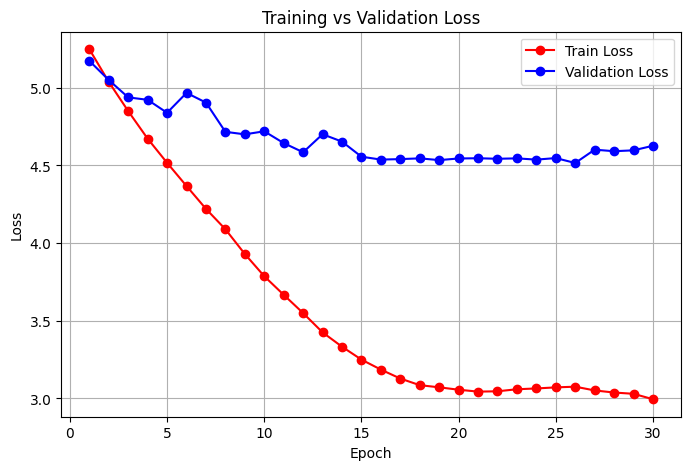

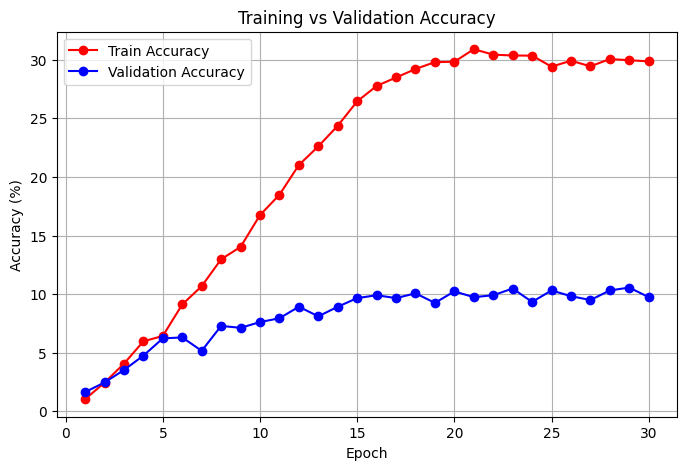

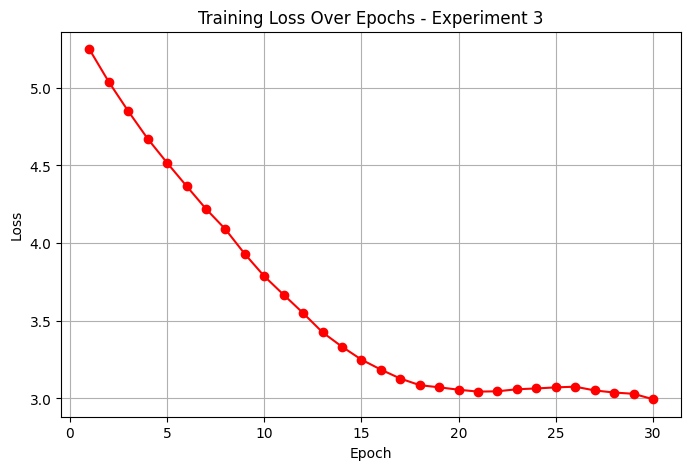

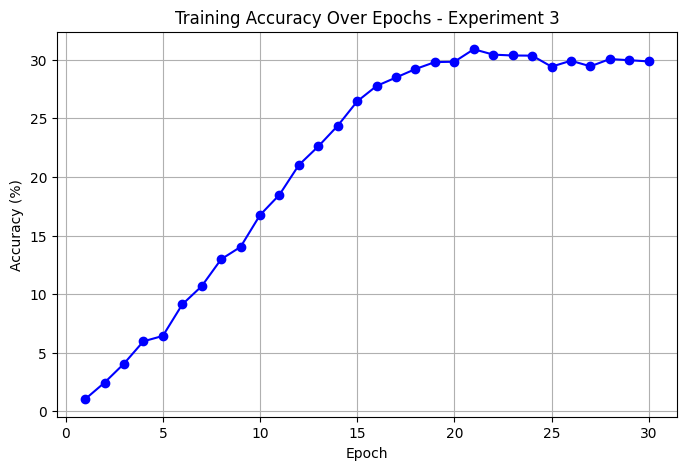

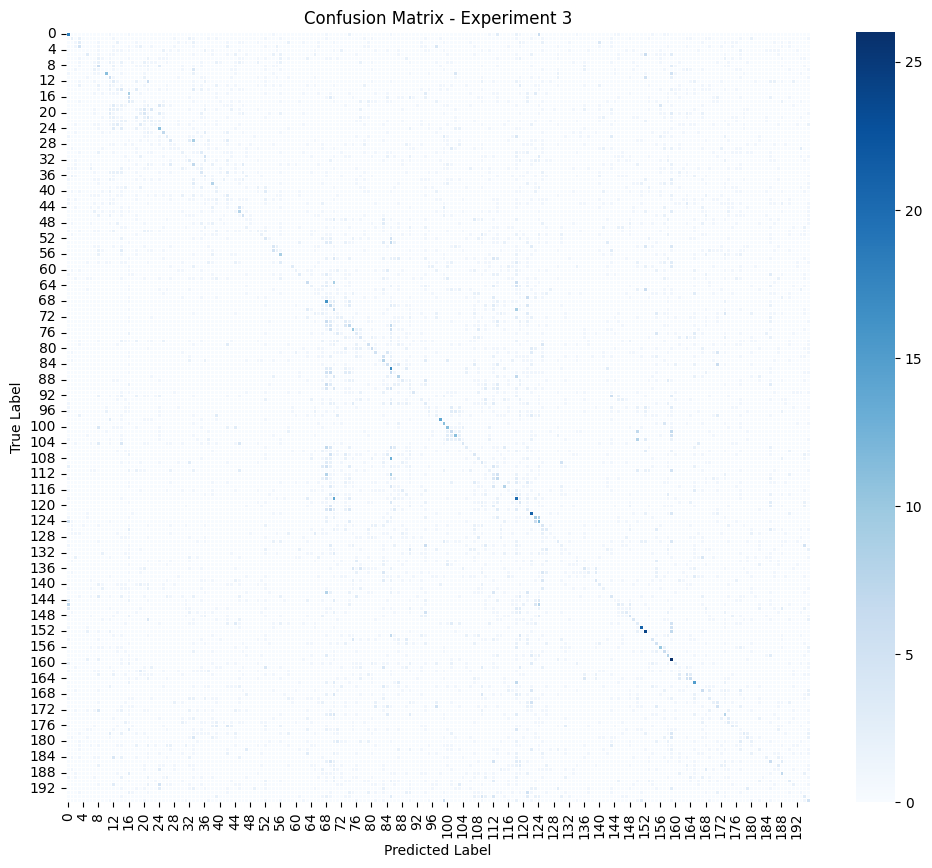

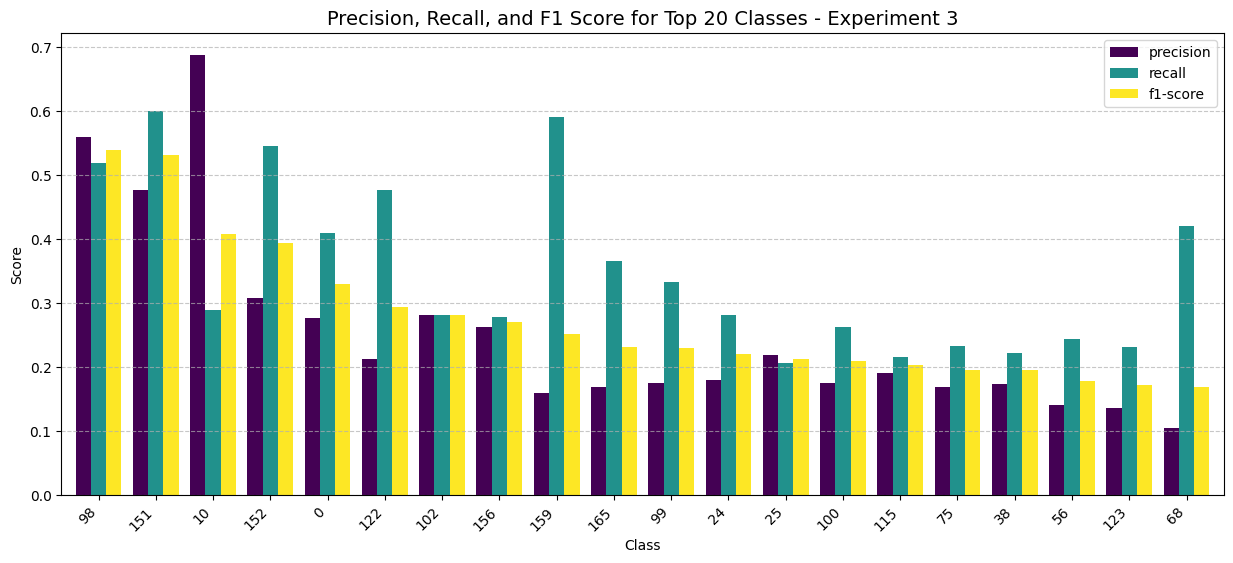

time: 1.96 s (started: 2025-03-20 13:43:04 +00:00)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report


plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, marker='o', linestyle='-', color='r', label="Train Loss")
plt.plot(range(1, len(val_losses) + 1), val_losses, marker='o', linestyle='-', color='b', label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, marker='o', linestyle='-', color='r', label="Train Accuracy")
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, marker='o', linestyle='-', color='b', label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, marker='o', linestyle='-', color='r')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs - Experiment 3")
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, marker='o', linestyle='-', color='b')
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Training Accuracy Over Epochs - Experiment 3")
plt.grid(True)
plt.show()


conf_matrix_3 = confusion_matrix(all_labels_3, all_preds_3, labels=range(196))
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix_3, annot=False, fmt="d", cmap="Blues", linewidths=0.5)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Experiment 3")
plt.show()


report_3 = classification_report(all_labels_3, all_preds_3, output_dict=True)
df_report_3 = pd.DataFrame(report_3).transpose()
df_report_3 = df_report_3.iloc[:-3, :3]


df_report_sorted_3 = df_report_3.sort_values(by="f1-score", ascending=False).head(20)
fig, ax = plt.subplots(figsize=(15, 6))
df_report_sorted_3.plot(kind="bar", ax=ax, width=0.8, colormap="viridis")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.title("Precision, Recall, and F1 Score for Top 20 Classes - Experiment 3", fontsize=14)
plt.ylabel("Score")
plt.xlabel("Class")
plt.legend(loc="upper right")
plt.show()


##**Saving the winning model**

In [ ]:
import torch
from google.colab import drive
import shutil


MODEL_WEIGHTS_PATH = "cnn_weights_conf3.pth"


torch.save(model.state_dict(), MODEL_WEIGHTS_PATH)
print(f"Weights saved successfully at: {MODEL_WEIGHTS_PATH}")

torch.save(model, "cnn_model_conf3.pth")
print("Model saved successfully as cnn_model_conf3.pth")





Weights saved successfully at: cnn_weights_conf3.pth
Model saved successfully as cnn_model_conf3.pth
time: 222 ms (started: 2025-03-20 14:30:35 +00:00)


##**Comprehensive Performance Comparison of the Three CNN Experiments**
This code compares the performance of the three different CNN models (Experiment 1, 2, and 3) using multiple visualizations:

Training vs. Validation Loss Comparison

Plots both training and validation loss over epochs for all three experiments to analyze learning behavior and detect overfitting.
Training vs. Validation Accuracy Comparison

Displays training and validation accuracy trends over epochs, showing which model generalized best.
Training Loss Comparison

Compares only training loss across experiments to evaluate convergence speed and stability.
Training Accuracy Comparison

Shows training accuracy progress over time, highlighting which model improved the most during training.
Confusion Matrix Comparison

Generates side-by-side confusion matrices for each experiment to visualize misclassification patterns.
Top 20 F1 Score Comparison

Extracts and compares the top 20 performing classes based on F1-score from the classification reports.
Displays the results in a grouped bar chart, highlighting differences in class-level performance.
These visualizations provide a comprehensive comparison of the experiments, helping to determine the best-performing model and identify areas for further improvement.


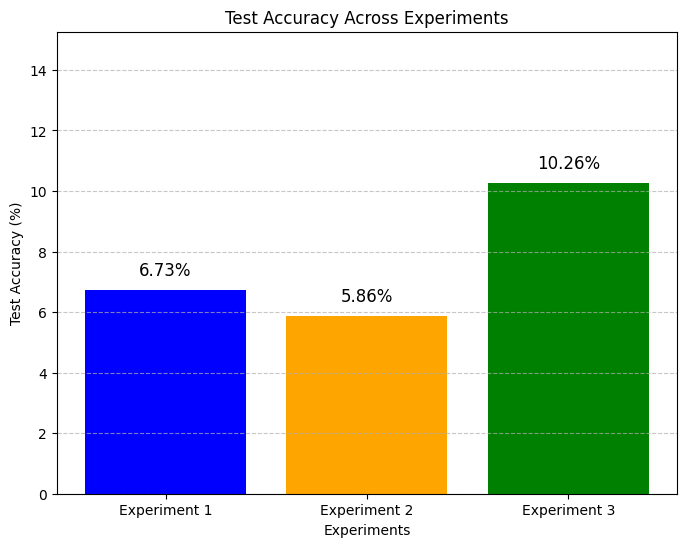

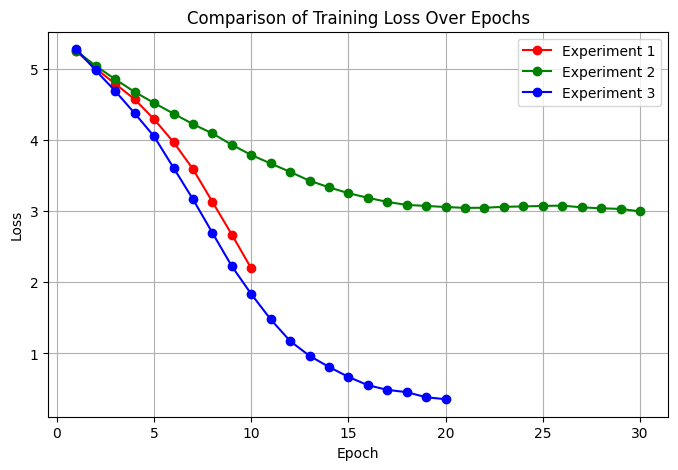

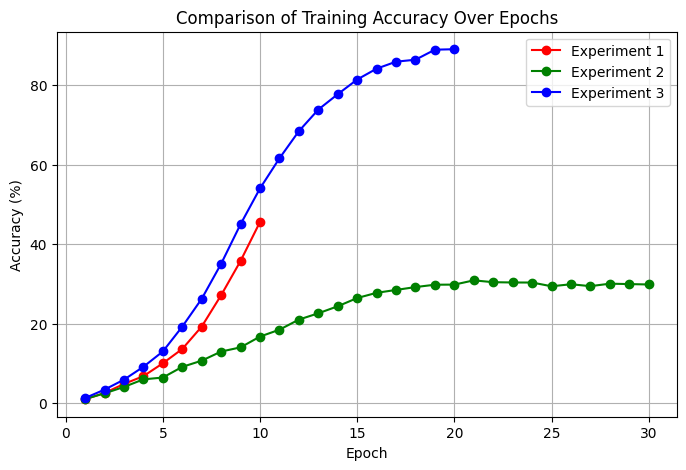

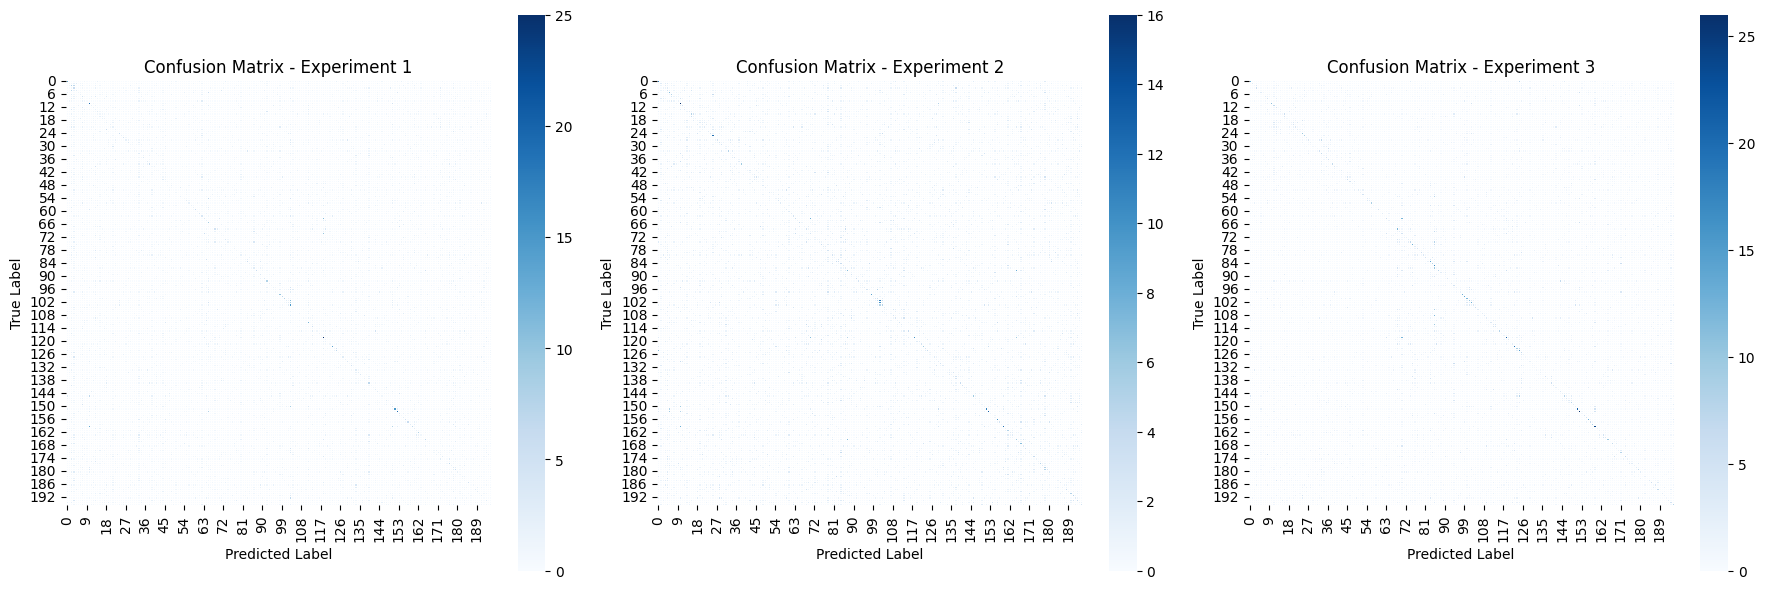

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


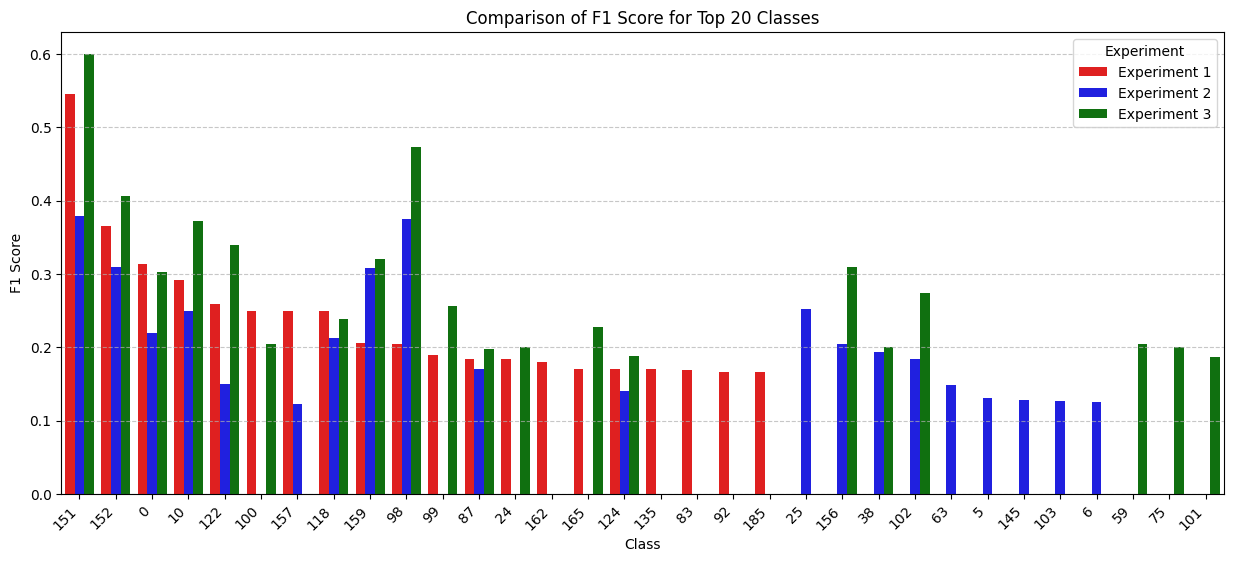

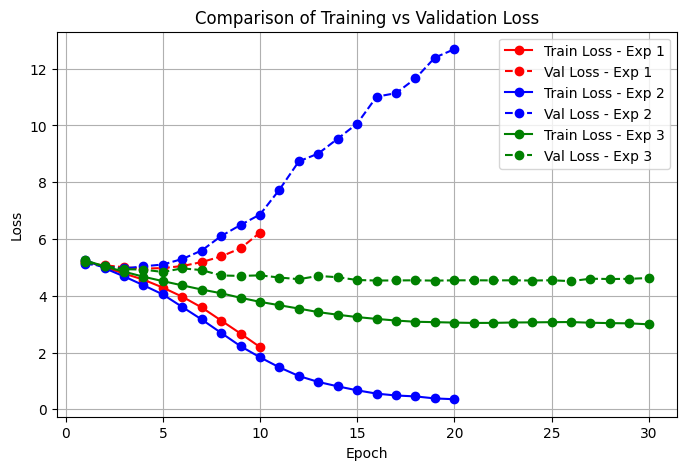

time: 3.35 s (started: 2025-03-20 14:27:05 +00:00)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

experiments = ["Experiment 1", "Experiment 2", "Experiment 3"]
accuracy_values = [acc1test, acc2test, final_accuracy]
plt.figure(figsize=(8, 6))
plt.bar(experiments, accuracy_values, color=['blue', 'orange', 'green'])
plt.xlabel("Experiments")
plt.ylabel("Test Accuracy (%)")
plt.title("Test Accuracy Across Experiments")
plt.ylim(0, max(accuracy_values) + 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(accuracy_values):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha='center', fontsize=12)
plt.show()


plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_losses_1) + 1), train_losses_1, marker='o', linestyle='-', color='r', label="Experiment 1")
plt.plot(range(1, len(train_losses) + 1), train_losses, marker='o', linestyle='-', color='g', label="Experiment 2")
plt.plot(range(1, len(train_losses_2) + 1), train_losses_2, marker='o', linestyle='-', color='b', label="Experiment 3")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Comparison of Training Loss Over Epochs")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_accuracies_1) + 1), train_accuracies_1, marker='o', linestyle='-', color='r', label="Experiment 1")
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, marker='o', linestyle='-', color='g', label="Experiment 2")
plt.plot(range(1, len(train_accuracies_2) + 1), train_accuracies_2, marker='o', linestyle='-', color='b', label="Experiment 3")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Comparison of Training Accuracy Over Epochs")
plt.legend()
plt.grid(True)
plt.show()


fig, axes = plt.subplots(1, 3, figsize=(18, 6))

conf_matrices = [
    (confusion_matrix(all_labels_1, all_preds_1, labels=range(196)), "Experiment 1"),
    (confusion_matrix(all_labels_2, all_preds_2, labels=range(196)), "Experiment 2"),
    (confusion_matrix(all_labels_3, all_preds_3, labels=range(196)), "Experiment 3")
]

for ax, (cm, title) in zip(axes, conf_matrices):
    sns.heatmap(cm, ax=ax, cmap="Blues", square=True, cbar=True, fmt="d", linewidths=0.5)
    ax.set_title(f"Confusion Matrix - {title}")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

plt.tight_layout()
plt.show()


df_report_1 = pd.DataFrame(classification_report(all_labels_1, all_preds_1, output_dict=True)).transpose()
df_report_2 = pd.DataFrame(classification_report(all_labels_2, all_preds_2, output_dict=True)).transpose()
df_report_3 = pd.DataFrame(classification_report(all_labels_3, all_preds_3, output_dict=True)).transpose()


df_1 = df_report_1.iloc[:-3, :].sort_values(by="f1-score", ascending=False).head(20).reset_index()
df_2 = df_report_2.iloc[:-3, :].sort_values(by="f1-score", ascending=False).head(20).reset_index()
df_3 = df_report_3.iloc[:-3, :].sort_values(by="f1-score", ascending=False).head(20).reset_index()

df_1["Experiment"] = "Experiment 1"
df_2["Experiment"] = "Experiment 2"
df_3["Experiment"] = "Experiment 3"

df_combined = pd.concat([df_1, df_2, df_3])
df_combined = df_combined.rename(columns={"index": "Class", "f1-score": "F1 Score"})


plt.figure(figsize=(15, 6))
sns.barplot(data=df_combined, x="Class", y="F1 Score", hue="Experiment", palette=["r", "b", "g"])
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.title("Comparison of F1 Score for Top 20 Classes")
plt.ylabel("F1 Score")
plt.xlabel("Class")
plt.legend(title="Experiment")
plt.show()


plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_losses_1) + 1), train_losses_1, marker='o', linestyle='-', color='r', label="Train Loss - Exp 1")
plt.plot(range(1, len(val_losses_1) + 1), val_losses_1, marker='o', linestyle='--', color='r', label="Val Loss - Exp 1")

plt.plot(range(1, len(train_losses_2) + 1), train_losses_2, marker='o', linestyle='-', color='b', label="Train Loss - Exp 2")
plt.plot(range(1, len(val_losses_2) + 1), val_losses_2, marker='o', linestyle='--', color='b', label="Val Loss - Exp 2")

plt.plot(range(1, len(train_losses) + 1), train_losses, marker='o', linestyle='-', color='g', label="Train Loss - Exp 3")
plt.plot(range(1, len(val_losses) + 1), val_losses, marker='o', linestyle='--', color='g', label="Val Loss - Exp 3")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Comparison of Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()



##**Test Environment for the Winning Model**
This script sets up a **testing environment** for the best-performing **ImprovedCNN** model, which was trained for **vehicle classification**. It first loads the trained model along with its saved weights and prepares it for evaluation. **the user uploads an image from their device**, which is then **preprocessed and passed through the model** for prediction. The **predicted label** is displayed prominently alongside the image, allowing for easy **visualization and validation** of the model's classification accuracy.

Using device: cuda
Model loaded successfully!
Please upload an image:


Saving ex4.png to ex4 (19).png
Selected image: ex4 (19).png


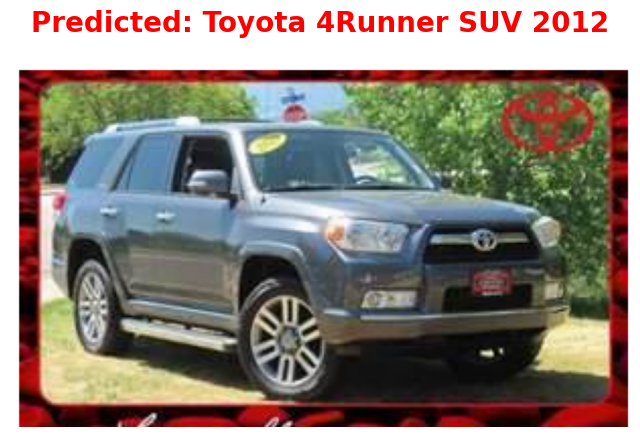

time: 8.99 s (started: 2025-03-20 14:31:41 +00:00)


In [ ]:
import torch
import torch.nn as nn
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image
import os


try:
    from google.colab import files
    colab_env = True
except ImportError:
    colab_env = False


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


class ImprovedCNN(nn.Module):
    def __init__(self, num_classes=196):
        super(ImprovedCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding=1), nn.BatchNorm2d(64), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, padding=1), nn.BatchNorm2d(128), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(128, 256, 3, padding=1), nn.BatchNorm2d(256), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(256, 512, 3, padding=1), nn.BatchNorm2d(512), nn.ReLU(), nn.AdaptiveAvgPool2d((4, 4)),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(0.4),
            nn.Linear(512 * 4 * 4, 1024), nn.ReLU(),
            nn.Linear(1024, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x



model = ImprovedCNN().to(device)
model.load_state_dict(torch.load(MODEL_WEIGHTS_PATH, map_location=device))
model.eval()
print("Model loaded successfully!")


if colab_env:
    print("Please upload an image:")
    uploaded = files.upload()
    image_path = list(uploaded.keys())[0]
else:
    image_path = input("Enter the path to the image: ")

if not os.path.exists(image_path):
    print("No image found. Exiting...")
    exit()

print(f"Selected image: {image_path}")


image = Image.open(image_path).convert('RGB')

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

input_tensor = transform(image).unsqueeze(0).to(device)


with torch.no_grad():
    outputs = model(input_tensor)
    _, predicted = outputs.max(1)
    predicted_class = predicted.item()

predicted_class_name = train_class_names[predicted_class]


fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image)
ax.axis("off")

ax.set_title(
    f"Predicted: {predicted_class_name}",
    fontsize=20, fontweight="bold", color="red", pad=20
)

plt.show()


##**Result analysis:**
**The winning model did indeed correctly predict the class of the car image. (According to the original classes of the database)**